In [60]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(trial_df, mouse_drug_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df = combined_mouse_df.sort_values('Timepoint')
combined_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [61]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mouse_df = combined_mouse_df.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
tumor_treatment_mean_df = pd.DataFrame(grouped_mouse_df['Tumor Volume (mm3)'].mean())
# Preview DataFrame
tumor_treatment_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [62]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame
tumor_treatment_sem_df = pd.DataFrame(grouped_mouse_df['Tumor Volume (mm3)'].sem())
# Preview DataFrame

tumor_treatment_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [63]:
# Minor Data Munging to Re-Format the Data Frames
tumor_treatment_mean_df  = tumor_treatment_mean_df.reset_index()
tumor_treatment_mean_df  = tumor_treatment_mean_df.set_index('Timepoint')
tumor_treatment_mean_df.head()

,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,45.000000
5,Capomulin,44.266086
10,Capomulin,43.084291
15,Capomulin,42.064317
20,Capomulin,40.716325


In [64]:
tumor_treatment_mean_df['Drug'].head()
#list(tumor_treatment_mean_df.index.unique())

Timepoint
0     Capomulin
5     Capomulin
10    Capomulin
15    Capomulin
20    Capomulin
Name: Drug, dtype: object

In [65]:
time = tumor_treatment_mean_df.index.unique()
tumor_drug_df = pd.DataFrame({'Timepoint': time})

tumor_drug_df.head()

,Timepoint
0,0
1,5
2,10
3,15
4,20


In [66]:
x = 'Capomulin'
drug_df = tumor_treatment_mean_df.loc[tumor_treatment_mean_df['Drug'] == x]
drug_df.head()
tumor_drug_df[x] = list(drug_df['Tumor Volume (mm3)'])
tumor_drug_df.head()

,Timepoint,Capomulin
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325


In [67]:
for x in tumor_treatment_mean_df['Drug'].unique():
    drug_df = tumor_treatment_mean_df.loc[(tumor_treatment_mean_df['Drug'] == x)]
    tumor_drug_df[x] = list(drug_df['Tumor Volume (mm3)'])
    #print(drug_df['Tumor Volume (mm3)'].head())
tumor_drug_df = tumor_drug_df.set_index('Timepoint')
tumor_drug_df.head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


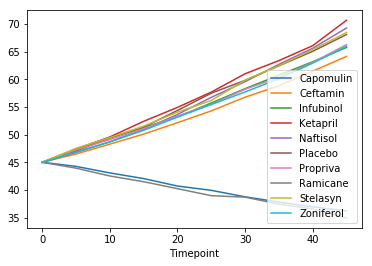

In [68]:
# Generate the Plot (with Error Bars)
tumor_drug_df.plot(kind='line')
# Save the Figure

Text(0, 0.5, 'Tumor Volume (mm3)')

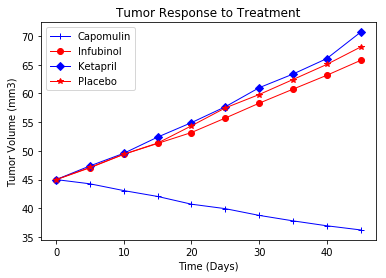

In [69]:


Capomulin, = plt.plot(time, tumor_drug_df["Capomulin"], marker="+",color="blue", linewidth=1)
Infubinol, = plt.plot(time, tumor_drug_df["Infubinol"], marker="o", color="Red", linewidth=1)
Ketapril, = plt.plot(time, tumor_drug_df["Ketapril"], marker="D",color="blue", linewidth=1)
Placebo, = plt.plot(time, tumor_drug_df["Placebo"], marker="*", color="Red", linewidth=1)
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(handles=[Capomulin,Infubinol, Ketapril, Placebo], loc="best")

plt.title('Tumor Response to Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

In [70]:
# Show the Figure
plt.savefig("../Images/Tumor_Drugs.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [71]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#metastatic_df = combined_mouse_df.loc['Metastatic' != 0]

grouped_met_df = combined_mouse_df.groupby(['Drug' ,'Timepoint'])
met_df = pd.DataFrame(grouped_met_df['Metastatic Sites'].mean())
# Convert to DataFrame

# Preview DataFrame
met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [72]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsem_df = pd.DataFrame(grouped_met_df['Metastatic Sites'].sem())
# Convert to DataFrame

# Preview DataFrame
metsem_df =  metsem_df.reset_index()
metsem_df['Drug'].unique()
metsem_df['Timepoint'].unique()
metsem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [73]:
met_drug_df = pd.DataFrame({'Timepoint': metsem_df['Timepoint'].unique()})
met_drug_df

,Timepoint
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


In [74]:
# Minor Data Munging to Re-Format the Data Frames
for x in metsem_df['Drug'].unique():
    drug_df = metsem_df.loc[(metsem_df['Drug'] == x)]
    met_drug_df[x] = list(drug_df['Metastatic Sites'])
    #print(drug_df['Tumor Volume (mm3)'].head())
met_drug_df = met_drug_df.set_index('Timepoint')
met_drug_df.head()
# Preview that Reformatting worked


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


<function matplotlib.pyplot.show(*args, **kw)>

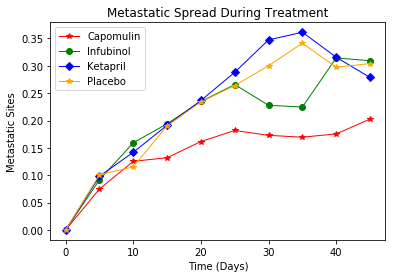

In [86]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
Capomulin, = plt.plot(time, met_drug_df["Capomulin"], marker="*",color="red", linewidth=1)
Infubinol, = plt.plot(time, met_drug_df["Infubinol"], marker="o", color="green", linewidth=1)
Ketapril, = plt.plot(time, met_drug_df["Ketapril"], marker="D",color="blue", linewidth=1)
Placebo, = plt.plot(time, met_drug_df["Placebo"], marker="*", color="orange", linewidth=1)
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(handles=[Capomulin,Infubinol, Ketapril, Placebo], loc="best")

plt.title('Metastatic Spread During Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

plt.savefig("../Images/met_Drugs.png")
plt.show

## Survival Rates

In [76]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mice_df = combined_mouse_df.groupby(['Drug' ,'Timepoint'])
mice_df = pd.DataFrame(grouped_met_df['Mouse ID'].count())
# Convert to DataFrame

# Preview DataFrame
mice_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [77]:
# Minor Data Munging to Re-Format the Data Frames
mice_df =  mice_df.reset_index()
# Preview the Data Frame


In [79]:
mice_drug_df = pd.DataFrame({'Timepoint': mice_df['Timepoint'].unique()})

for x in mice_df['Drug'].unique():
    drug_df = mice_df.loc[(mice_df['Drug'] == x)]
    mice_drug_df[x] = list(drug_df['Mouse ID'])
    #print(drug_df['Tumor Volume (mm3)'].head())
mice_drug_df = mice_drug_df.set_index('Timepoint')
mice_drug_df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [92]:
mice_drug_per_df = mice_drug_df
for x in mice_df['Drug'].unique():
    mice_drug_per_df[x] = mice_drug_per_df[x]/mice_drug_per_df[x][0]*100
mice_drug_per_df.head()    

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


<function matplotlib.pyplot.show(*args, **kw)>

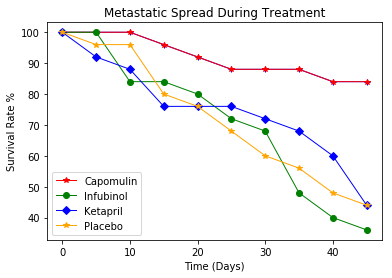

In [93]:
# Generate the Plot (Accounting for percentages)

# Save the Figure
Capomulin, = plt.plot(time, mice_drug_per_df["Capomulin"], marker="+",color="blue", linewidth=1)

Capomulin, = plt.plot(time, mice_drug_per_df["Capomulin"], marker="*",color="red", linewidth=1)
Infubinol, = plt.plot(time, mice_drug_per_df["Infubinol"], marker="o", color="green", linewidth=1)
Ketapril, = plt.plot(time, mice_drug_per_df["Ketapril"], marker="D",color="blue", linewidth=1)
Placebo, = plt.plot(time, mice_drug_per_df["Placebo"], marker="*", color="orange", linewidth=1)
# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(handles=[Capomulin,Infubinol, Ketapril, Placebo], loc="best")

plt.title('Metastatic Spread During Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")

plt.savefig("../Images/m_Drugs.png")
# Show the Figure
plt.show

## Summary Bar Graph

In [94]:
# Calculate the percent changes for each drug

# Display the data to confirm
tumor_drug_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [ ]:
for x in mice_df['Drug'].unique():
    mice_drug_per_df[x] = mice_drug_per_df[x]/mice_drug_per_df[x][0]*100
mice_drug_per_df.head()   

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()